In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Numeros aleatorios

In [10]:
np.random.random() #distribucion uniforme

0.36882427400714424

In [14]:
## semilla, seed
np.random.seed(1234)
np.random.random()

0.1915194503788923

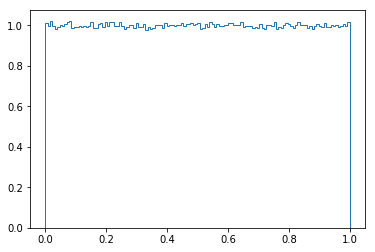

In [37]:
np.random.seed(1234)
aleatorios = np.random.random(1000000)
plt.hist(aleatorios,bins = 128, histtype="step", density= True) #normed seria la funcion para normalizar, pero 
                                                                # nos recomendo utilizar density
plt.show()

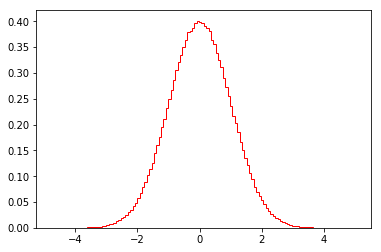

In [38]:
np.random.seed(1234)
aleatorios = np.random.randn(1000000)
plt.hist(aleatorios,bins = 128, histtype="step",color = "red", density= True)                                                                
plt.show()

## Casino

### Dados...

In [40]:
def rollDice():
    return np.random.randint(1,7)

In [46]:
[rollDice() for i in range(10)]

[5, 4, 3, 1, 6, 5, 3, 2, 2, 3]

In [56]:
def rollGame():
    roll = np.random.randint(1,7)
    if roll >= 4:
        print("El resultado fue %s, pierdes! Looser! Juega otra vez" %roll)
    else:
        print("El resultado es %s, Ganaste!" %roll)

In [57]:
rollGame()

El resultado es 3, Ganaste!


In [70]:
def rollGame():
    roll = np.random.randint(1,7)
    if roll >= 4:
        return False
    else:
        return True

In [71]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
        else:
            valor -= apuesta
        apuestaActual += 1
        print("Fondos: ", valor)

In [72]:
apostador_simple(10000,100,5)

Fondos:  9900
Fondos:  9800
Fondos:  9700
Fondos:  9800
Fondos:  9700


In [92]:
def apostador_simple(fondos, ini_apuesta, n_apuestas):
    valor = fondos
    apuesta = ini_apuesta
    apuestaActual = 0
    wX, wY = [], []
    while apuestaActual < n_apuestas:
        if rollGame():
            valor += apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        else:
            valor -= apuesta
            wX.append(apuestaActual)
            wY.append(valor)
        apuestaActual += 1
    plt.plot(wX, wY, lw = .5)

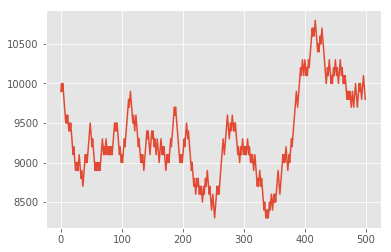

In [84]:
apostador_simple(10000,100,500)

In [83]:
plt.style.use("ggplot")

In [106]:
plt.style.use("dark_background")

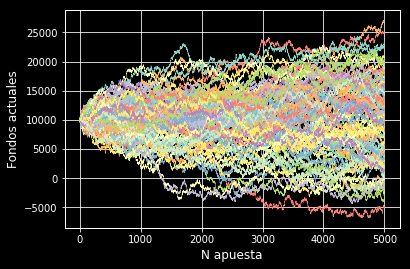

In [108]:
x = 0
while x < 100:
    apostador_simple(10000, 100, 5000)
    x += 1
    plt.grid(True, color = "w")
    plt.ylabel("Fondos actuales")
    plt.xlabel("N apuesta")
plt.show()

# Borracho caminando

### Caminata aleatoria

In [104]:
np.cumsum    

SyntaxError: invalid syntax (<ipython-input-104-54093b41f7ee>, line 1)

In [109]:
numeros = np.array([1,2,3,4,5,6])

In [110]:
np.cumsum(numeros)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [113]:
plt.style.use("ggplot")

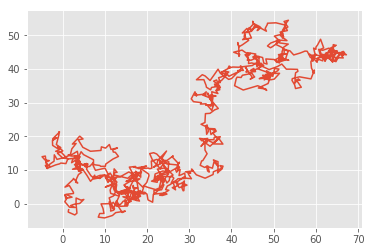

In [122]:
npasos = 1000
x = np.cumsum(np.random.randn(npasos))
y = np.cumsum(np.random.randn(npasos))
plt.plot(x,y)
plt.show()

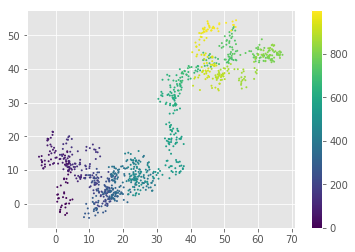

In [123]:
plt.scatter(x,y, c = range(npasos), lw = 0,
           marker = "o", s = 4, cmap = "viridis")
plt.colorbar()
plt.show()

In [124]:
plt.style.use("dark_background")

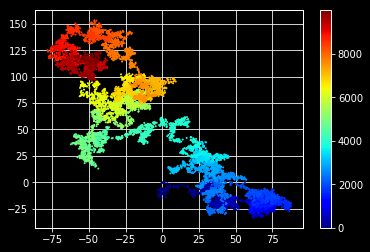

In [132]:
npasos = 10000
x = np.cumsum(np.random.randn(npasos))
y = np.cumsum(np.random.randn(npasos))
plt.scatter(x,y, c = range(npasos), lw = 0,
           marker = "o", s = 4, cmap = "jet")
plt.colorbar()
plt.show()

## Cadenas de markov

In [ ]:
n = 7000000000 # Tamanho de la poblacion maximo
a = .5/n # razon de nacimientos
b = .2/n # razon de muerte
npasos = 1000
x = np.zeros(npasos)
x[0] = 25 # poblacion inicial
for t in range(npasos - 1):
    if 0 < x[t] < n - 1:
        nacimiento = np.random.rand() <= a*x[t]
        muerte = np.random.rand() <= b*x[t]
        x[t + 1] = x[t] + nacimiento*1 - muerte*1
    else:
        x[t + 1] = x[t]

<function matplotlib.pyplot.show(*args, **kw)>

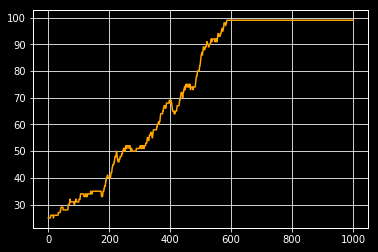

In [140]:
plt.plot(x, c = "orange")
plt.show